### Harsh Arora 
### AE-1218
### BSc(Hons) Computer Science


In [5]:
import warnings
warnings.filterwarnings("ignore")


In [6]:
# 1 .  Use Simple K-means algorithm for clustering on any dataset. Compare the performance of clusters by changing the initialization parameters (rand, 
# kmeans++,fixed) involved in the algorithm. Compare the SSE and weighted purity of these  three clustering schemes

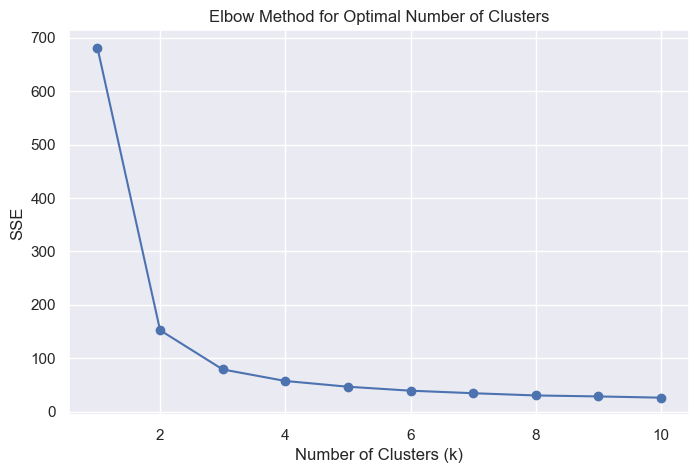

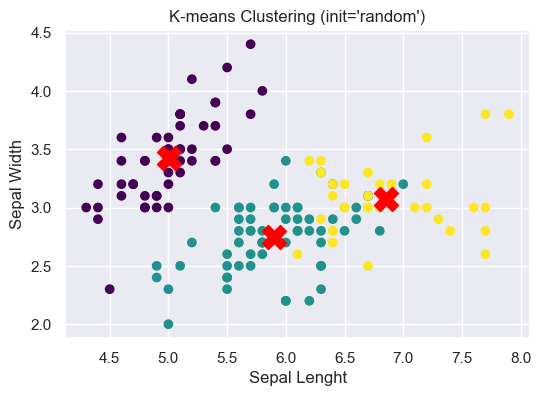

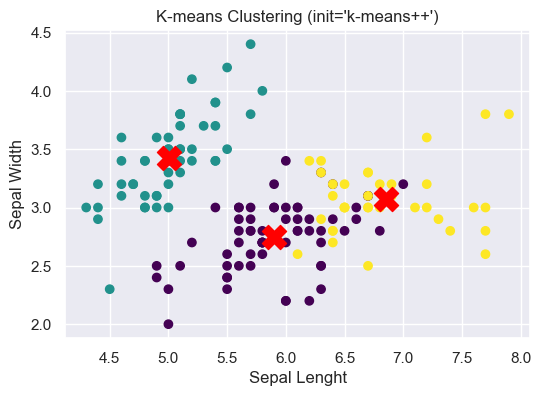

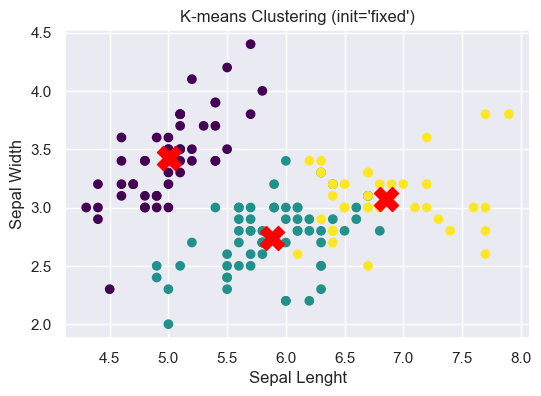

  Initialization        SSE  Weighted Purity
0         random  78.851441         0.893333
1      k-means++  78.851441         0.893333
2          fixed  78.855666         0.886667


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
data = load_iris()
X = data.data
y_true = data.target

# Function to calculate SSE (Sum of Squared Errors)
def calculate_sse(kmeans, X):
    return kmeans.inertia_

# Function to calculate Weighted Purity
def calculate_weighted_purity(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

# Elbow plot to find the optimal number of clusters
sse_list = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    sse_list.append(calculate_sse(kmeans, X))

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse_list, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

initializations = ['random', 'k-means++', 'fixed']

fixed_centroids = np.array([
    [5.0, 3.5, 1.4, 0.2], 
    [6.0, 3.0, 4.0, 1.3], 
    [6.5, 3.0, 5.5, 2.0]  
])

results = []

for init_method in initializations:
    if init_method == 'fixed':
        kmeans = KMeans(n_clusters=3, init=fixed_centroids, n_init=1, max_iter=300, random_state=42)
    else:
        kmeans = KMeans(n_clusters=3, init=init_method, n_init=10, max_iter=300, random_state=42)
    
    kmeans.fit(X)
    y_pred = kmeans.labels_
    
    sse = calculate_sse(kmeans, X)
    weighted_purity = calculate_weighted_purity(y_true, y_pred)
    
    results.append({
        'Initialization': init_method,
        'SSE': sse,
        'Weighted Purity': weighted_purity
    })
    
    # Plot the clusters using the first two features
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.title(f"K-means Clustering (init='{init_method}')")
    plt.xlabel('Sepal Lenght')
    plt.ylabel('Sepal Width')
    plt.show()

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


In [8]:
# 2 .Use Iris/ Dry Bean Dataset/Wine dataset to apply Hierarchical agglomerative clustering and plot the dendrogram

In [9]:
from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

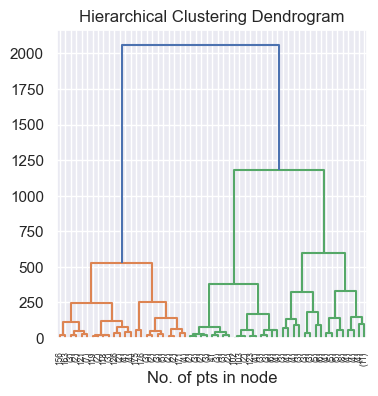

In [20]:
import seaborn  as sns
from sklearn.cluster import AgglomerativeClustering
sns.set_theme(rc={'figure.figsize':(4,4)})
agglomerative = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model=agglomerative.fit(Z)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("No. of pts in node")
plt.show()

In [12]:
# 3. Find the desired number of clusters as per total class labels on the selected dataset using Hierarchical agglomerative clustering then compute 
#following supervised evaluation metrics:
#Entropy , Weighted purity ,Precision ,Recall ,F-measure

In [13]:
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.stats import entropy

data = load_wine()
X = data.data
y_true = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of clusters based on the number of class labels
n_clusters = len(np.unique(y_true))

Z = linkage(X_scaled, method='ward')

y_pred = fcluster(Z, n_clusters, criterion='maxclust')

conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate Entropy for each cluster and the overall entropy
cluster_entropy = []
for i in range(n_clusters):
    cluster_labels = conf_matrix[i, :]
    cluster_probabilities = cluster_labels / np.sum(cluster_labels)
    cluster_entropy.append(entropy(cluster_probabilities))
overall_entropy = np.mean(cluster_entropy)

# Calculate Weighted Purity
def weighted_purity(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

weighted_purity_value = weighted_purity(y_true, y_pred)

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f_measure = f1_score(y_true, y_pred, average='weighted')

print(f'Number of Clusters: {n_clusters}')
print(f'Overall Entropy: {overall_entropy}')
print(f'Weighted Purity: {weighted_purity_value}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F-measure: {f_measure}')


Number of Clusters: 3
Overall Entropy: 0.19935143081047832
Weighted Purity: 0.9269662921348315
Precision: 0.05698234349919743
Recall: 0.0449438202247191
F-measure: 0.05025214544811112


In [24]:
# 4 .  Apply DBSCAN on the dataset having class labels and plot F-measure for different values of epsilon to show its impact on clustering scheme. Sim, 
# vary minimum-points and note the change in weighted purity  on the same dataset by plotting bar plot. Display number of outliers detected in each case.

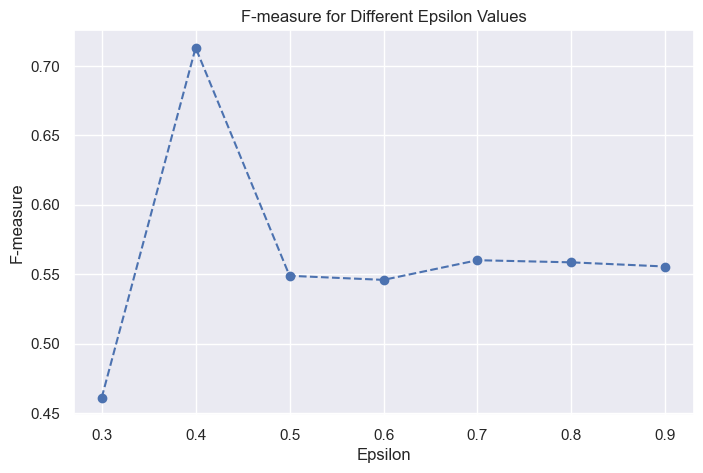

Epsilon: 0.3, Number of outliers: 96
Epsilon: 0.4, Number of outliers: 32
Epsilon: 0.5, Number of outliers: 17
Epsilon: 0.6000000000000001, Number of outliers: 9
Epsilon: 0.7000000000000002, Number of outliers: 3
Epsilon: 0.8000000000000003, Number of outliers: 2
Epsilon: 0.9000000000000001, Number of outliers: 0


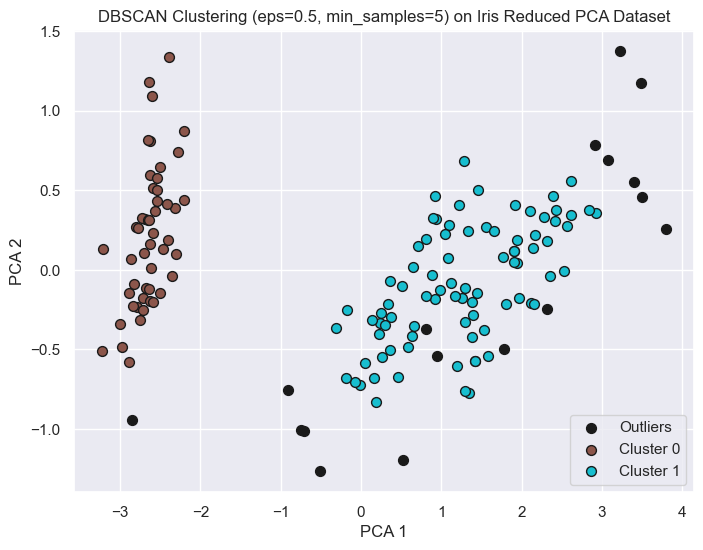

In [34]:
from sklearn.metrics import f1_score, confusion_matrix

# Load the Iris dataset
data = load_iris()
X = data.data
y_true = data.target

# Function to calculate Weighted Purity
def calculate_weighted_purity(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

# Function to calculate F-measure (F1-score)
def calculate_fmeasure(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

# Lists to store results
epsilons = np.arange(0.3, 0.9, 0.1)  # Epsilon values from 0.3 to 0.8
f_measure_results = []
outliers_detected = []
weighted_purity_results = []

min_samples = 5  

# Apply DBSCAN for varying epsilon values
for epsilon in epsilons:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
    dbscan.fit(X)
    
    labels = dbscan.labels_
    
    f_measure = calculate_fmeasure(y_true, labels)
    f_measure_results.append(f_measure)
    
    weighted_purity = calculate_weighted_purity(y_true, labels)
    weighted_purity_results.append(weighted_purity)
    
    n_outliers = np.sum(labels == -1)
    outliers_detected.append(n_outliers)

# Plot F-measure for different epsilon values
plt.figure(figsize=(8, 5))
plt.plot(epsilons, f_measure_results, marker='o', linestyle='--', color='b')
plt.title('F-measure for Different Epsilon Values')
plt.xlabel('Epsilon')
plt.ylabel('F-measure')
plt.show()


# Display number of outliers detected for each case
for epsilon, outliers in zip(epsilons, outliers_detected):
    print(f"Epsilon: {epsilon}, Number of outliers: {outliers}")

# Visualize the DBSCAN clustering result with a specific epsilon
# Adjust this value to visualize a specific case
epsilon = 0.5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
dbscan.fit(X)

labels = dbscan.labels_

# Reduce the dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for i, label in enumerate(unique_labels):
    if label == -1:
        # Plot outliers in black
        color = 'k'
        label_name = 'Outliers'
    else:
        color = colors(i)
        label_name = f'Cluster {label}'
        
    plt.scatter(X_reduced[labels == label, 0], X_reduced[labels == label, 1], 
                color=color, label=label_name, edgecolor='k', s=50)

plt.title(f'DBSCAN Clustering (eps={epsilon}, min_samples={min_samples}) on Iris Reduced PCA Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()



Number of Outliers Detected for Different Minimum Points Values:
Min Points: 3, Outliers: 17
Min Points: 4, Outliers: 33
Min Points: 5, Outliers: 34
Min Points: 6, Outliers: 42
Min Points: 7, Outliers: 46
Min Points: 8, Outliers: 59
Min Points: 9, Outliers: 68


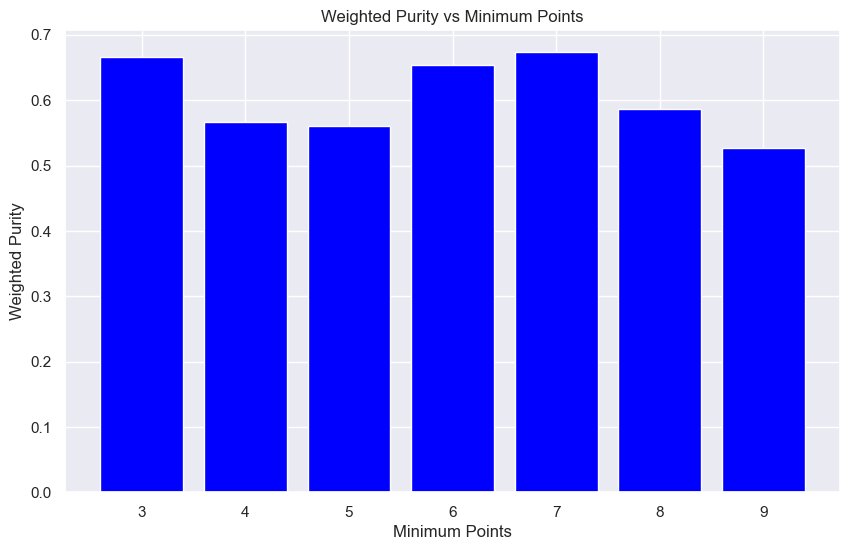

In [36]:

y_true = pd.Series(data.target)


# Initialize lists to store results
min_samples_values = np.arange(3, 10)  # Range of min_samples values to test
purity_scores = []
outlier_counts_min_samples = []

# Loop over min_samples values to apply DBSCAN and calculate weighted purity
print("\nNumber of Outliers Detected for Different Minimum Points Values:")
for min_samples in min_samples_values:
    db = DBSCAN(eps=0.5, min_samples=min_samples)  # Example eps value given before
    y_pred = db.fit_predict(X_scaled)
    
    # Calculate weighted purity
    clusters = set(y_pred)
    purity = 0
    if len(clusters) > 1:
        for cluster in clusters:
            if cluster == -1:
                continue  # Ignore outliers for purity calculation
            cluster_indices = np.where(y_pred == cluster)
            most_common_class = y_true.iloc[cluster_indices].mode()[0]
            purity += np.sum(y_true.iloc[cluster_indices] == most_common_class)
        purity /= len(X)
    purity_scores.append(purity)
    
    # Count outliers (points labeled as -1)
    outlier_count = np.sum(y_pred == -1)
    outlier_counts_min_samples.append(outlier_count)
    
    # Display number of outliers detected
    print(f"Min Points: {min_samples}, Outliers: {outlier_count}")

# Bar plot for Weighted Purity vs min_samples
plt.figure(figsize=(10, 6))
plt.bar(min_samples_values, purity_scores, color='blue')
plt.title('Weighted Purity vs Minimum Points')
plt.xlabel('Minimum Points')
plt.ylabel('Weighted Purity')
plt.show()



# 5. Compare the clustering output of these three clustering algorithms (kmeans/Agglomerative/DBSCAN) using bar plot on a labelled dataset considering optimal parameter setting for each.

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

iris_data = load_iris()
X_iris = iris_data.data  
true_labels = iris_data.target 

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_iris)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Calculate Weighted Purity for KMeans
kmeans_weighted_purity = calculate_weighted_purity(true_labels, kmeans_labels)

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)

# Calculate Weighted Purity for Agglomerative Clustering
agglo_weighted_purity = calculate_weighted_purity(true_labels, agglo_labels)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Optimal settings based on earlier analysis
dbscan_labels = dbscan.fit_predict(data_scaled)

# Output results
print("KMeans Weighted Purity:", kmeans_weighted_purity)
print("Agglomerative Weighted Purity:", agglo_weighted_purity)
print("DBSCAN Weighted Purity:", dbscan_weighted_purity)

KMeans Weighted Purity: 0.6666666666666666
Agglomerative Weighted Purity: 0.8266666666666667
DBSCAN Weighted Purity: 0.7518796992481203


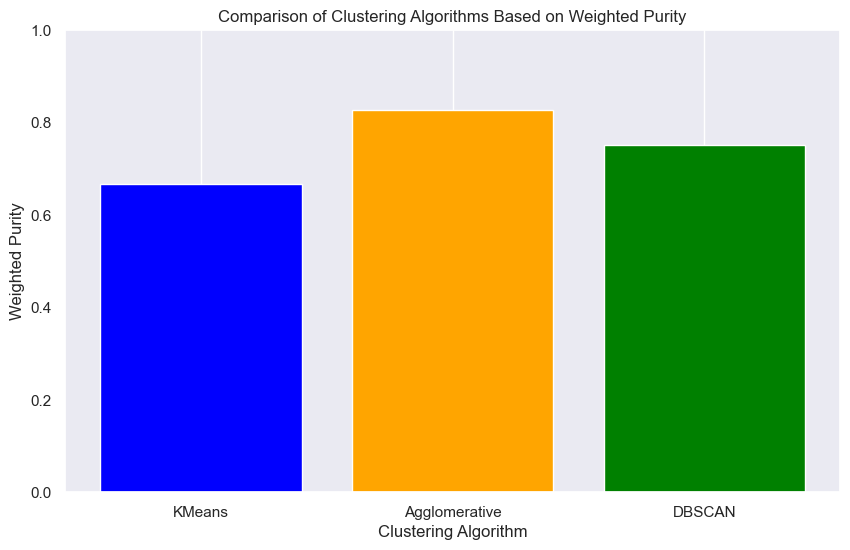

In [39]:
# Prepare data for bar plot
algorithms = ['KMeans', 'Agglomerative', 'DBSCAN']
purities = [kmeans_weighted_purity, agglo_weighted_purity, dbscan_weighted_purity]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, purities, color=['blue', 'orange', 'green'])
plt.title('Comparison of Clustering Algorithms Based on Weighted Purity')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Weighted Purity')
plt.
plt.ylim(0, 1) 
plt.grid(axis='y')
